# HW 4: Implementing a Neural Network

In this homework assignment, you will implement a neural network from scratch using [`numpy`](https://numpy.org/).

There are three parts to this assignment:
- In part 1, you will implement a neural network that processes a single training sample at a time.  
- In part 2, you will vectorize your implementation to process all training samples in parallel.
- In part 3, you will use your neural network implementation to train an autoencoder.

A few important notes:
* For autograding purposes, many cells are set in *read-only* mode.  This means you cannot edit, delete, or move these cells. 

* For parts 1 and 2, you should not modify any code except where you see `# YOUR CODE HERE`.  Please remove `raise NotImplementedError()` and write your code in its place.

* We provide code cells that check your code as you progress through the assignment. These tests will help catch obvious errors, but passing these tests is not a guarantee that your implementation is correct. Your notebook will be graded on a more complete set of tests which are not visible to you.

* You may add new cells anywhere in the notebook while working, but make sure to delete them before submitting your assignment.  Please do not change the sequence of the cells.  This is to ensure that autograding works properly.

* If you run cells out of order, it may change variable values which may cause tests to fail.  The easiest way to avoid this problem is to use the ***Restart & Run all*** option available in the **Kernel** tab.  Before submitting, you should do this to ensure that your notebook can be run from beginning to end without errors.  This is how your notebook will be graded.

## Part 1

In this part you will implement a simple neural network with one hidden layer.  This implementation will process one data point at a time.  You will have to implement functions to do the following:

* initialize network weights
* calculate sigmoid function
* calculate softmax function
* forward propagation
* calculate cross-entropy loss
* backward propagation
* update network weights
* train the network on a set of data points
* use the trained network to make a prediction

Let's first define our notation:

* The input $x$ and output $y$ are vectors of shape $(1, n_0)$ and $(1, n_2)$ respectively. 

* The number of nodes in the input, hidden, and output layers are $n_0$, $n_1$, and $n_2$ respectively.

* The weights connecting the input and hidden layer are given by the matrix $W_1$ of shape $(n_0, n_1)$.

* The weights connecting the hidden and output layer are given by the matrix $W_2$ of shape $(n_1, n_2)$.

* The bias terms feeding into the hidden layer are given by the vector $b_1$ of shape $(1, n_1)$.

* The bias terms feeding into the output layer are given by the vector $b_2$ of shape $(1, n_2)$.

* The sigmoid activations for the hidden layer are given by the vector $a_1$ of shape $(1, n_1)$.

* The softmax outputs at the output layer are given by the vector $a_2$ of shape $(1, n_2)$.

Make sure to double check your dimensions when debugging.  Caution: An array of shape (1, n) is *not* the same as an array of shape (n, ).

Let's define our layer sizes:

In [1]:
n0 = 4 # size of input layer
n1 = 7 # size of hidden layer
n2 = 3 # size of output layer

In [2]:
import numpy as np
import time

#### Initialize weight matrices

Initialize the weight matrices $W_1$ and $W_2$ with small random values.  You can use [`np.random.randn()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) and multiply the matrices by $0.01$.

In [3]:
def initialize_weights(n0, n1, n2):
    '''
    Returns a tuple (W1, W2) containing the initialized weight matrices.
    '''
    np.random.seed(0)
    
    # Make weights
    W1 = np.random.randn(n0,n1) * 0.01
    W2 = np.random.randn(n1,n2) * 0.01
    return (W1, W2)


In [4]:
W1, W2 = initialize_weights(n0, n1, n2)

In [5]:
assert isinstance(W1, np.ndarray), "W1 should be a numpy array."
assert isinstance(W2, np.ndarray), "W2 should be a numpy array."

assert W1.shape[0] == n0, "The number of rows in W1 is incorrect."
assert W1.shape[1] == n1, "The number of columns in W1 is incorrect."

assert W2.shape[0] == n1, "The number of rows in W2 is incorrect."
assert W2.shape[1] == n2, "The number of columns in W2 is incorrect."

assert np.sum(np.abs(W1)) != 0, "All the elements in W1 should not be zero."
assert np.sum(np.abs(W2)) != 0, "All the elements in W2 should not be zero."

assert np.round(W1[0,0], decimals=8) == 0.01764052, "Your matrices are not normalized correctly."

#### Initialize bias terms

Initialize the bias terms $b_1$ and $b_2$ with zeros.  You can use [`np.zeros()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html).

In [6]:
def initialize_bias(n0, n1, n2):
    '''
    Returns a tuple of vectors (b1, b2) with the initialized bias terms.
    '''
    
    #Make bias terms
    b1 = np.zeros((1,n1))
    b2 = np.zeros((1,n2))
    
    return (b1, b2)

In [7]:
b1, b2 = initialize_bias(n0, n1, n2)

In [8]:
assert isinstance(b1, np.ndarray), "b1 should be a numpy array."
assert isinstance(b2, np.ndarray), "b2 should be a numpy array."

assert b1.shape[0] == 1, "The number of rows in b1 is incorrect."
assert b1.shape[1] == n1, "The number of columns in b1 is incorrect."

assert b2.shape[0] == 1, "The number of rows in b2 is incorrect."
assert b2.shape[1] == n2, "The number of columns in b2 is incorrect."

assert np.all(b1 == 0), "The values in b1 should be all zeros, but they are not."
assert np.all(b2 == 0), "The values in b2 should be all zeros, but they are not."

#### Sigmoid activation function

$$sig(z) = \frac{1}{1+e^{-z}}$$

Define the sigmoid activation function.  If the input is a numpy array, the function should apply the sigmoid activation function to each element.

In [9]:
def sigmoid(z):
    '''
    Returns the sigmoid function value for each element in z.
    '''
    
    #Implement the sigmoid with np
    s = 1/(1+np.exp(-1*z))
    
    return s

In [10]:
assert sigmoid(0) == 0.5, "Returns incorrect value for z = 0."
assert sigmoid(np.Inf) == 1, "Returns incorrect value for z = infinity."
assert sigmoid(np.NINF) == 0, "Returns incorrect value for z = -infinity."
assert np.isnan(sigmoid(np.nan)), "Returns incorrect value when z is nan."

assert np.allclose(np.round(sigmoid(np.array([1, 2, 3])), decimals=8), np.array([0.73105858, 0.88079708, 0.95257413])), "Returns incorrect values for 1D input."
assert np.allclose(np.round(sigmoid(np.array([[-1, 6], [-3, np.Inf], [4, np.NINF]])), decimals=8),  np.array([[0.26894142, 0.99752738], [0.04742587, 1], [0.98201379, 0]])), "Returns incorrect values for 2D input."

##### Softmax function

$$ softmax([z_1, \dots, z_k]) = \left[\frac{e^{z_1}}{e^{z_1}+ \dots + e^{z_k}}, \dots, \frac{e^{z_k}}{e^{z_1}+ \dots + e^{z_k}}\right]$$

The softmax function takes an input vector of length $k$ and returns a valid probability distribution.  In other words, it converts a set of $k$ numerical scores into a set of $k$ probabilities.  This is useful for multi-class classification, where we want to know the probability that the input is from a certain class.  Note that adding a constant scalar to all terms does not change the output:

$$ softmax([z_1, z_2, \dots, z_k]) = softmax([z_1 + c, z_2 + c, \dots, z_k + c])$$

In practice, it is useful to first subtract $c = max\{z_1, z_2, \dots, z_k\}$ from the input terms in order to avoid numerical overflow or underflow.

Define the softmax function.  Since we will use this function in both part 1 and part 2, we will implement a vectorized version.  Your implementation should use vectorized operations and broadcasting, so it should not have any for loops.  You may need to use [`np.max()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html), [`np.exp()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html), and [`np.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html).

In [11]:
def softmax(Z):
    '''
    Applies the softmax function to each row of a matrix Z.
    This implementation should be vectorized, so it should not contain any for loops.
    '''
    assert isinstance(Z, np.ndarray) and Z.ndim == 2, "Input should be a 2D numpy array."
    
    #Calculate exponentials(with the offset to avoid overflow)
    expZ = np.exp(Z-np.max(Z))
    #Divide each by the sum of the rest
    Z = np.divide(expZ, np.reshape(np.sum(expZ, axis = 1), (Z.shape[0],1)))
    return Z

In [12]:
assert np.allclose(np.round(softmax(np.array([[0, 0, 0, 0]])), decimals=8), np.array([[0.25, 0.25, 0.25, 0.25]])), "Returns incorrect result for all zero matrix."
assert np.allclose(np.round(softmax(np.array([[1, 2, 3]])), decimals=8), np.array([[0.09003057, 0.24472847, 0.66524096]])), "Returns incorrect result for non-zero single row matrix."
assert np.allclose(np.round(softmax(np.array([[-2, 0, 10]])), decimals=8), np.array([[6.1400000e-06, 4.5400000e-05, 9.9994846e-01]])), "Returns incorrect result for single row matrix with."
assert np.allclose(np.round(softmax(np.array([[0, 0], [-3.2, 1.1], [4, 3.4]])), decimals=8),  np.array([[0.5, 0.5],[0.01338692, 0.98661308],[0.64565631, 0.35434369]])), "Returns incorrect result for non-zero multiple row matrix."

In [13]:
assert np.allclose(np.round(softmax(np.array([[1e6, 1e6, 1e6, 1e6]])), decimals=8), np.array([[0.25, 0.25, 0.25, 0.25]])), "Your implementation does not handle numerical overflow."

#### Forward propagation

The process of propagating the input through the layers of the neural network to get the output is called forward propagation.  In our case, forward propagation consists of the following steps:

* The input vector $x$ is fed into the network, multiplied by the weight matrix $W_1$, and the bias terms $b_1$ are added to the result.  The resulting vector $z_1$ is passed through the sigmoid activation function to produce the hidden layer activations $a_1$.
* The activations $a_1$ are fed as input to the second layer, multiplied by the weight matrix $W_2$, and the bias terms $b_2$ are added to the result.  The resulting vector $z_2$ is passed through the softmax function to produce the output activations $a_2$.



Implement the forward propagation function.  You can use [`np.matmul()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) or `@` for matrix multiplication.  Be sure to check the dimensions of your variables in order to determine the correct order of matrix multiplication. 

In [14]:
def forward_propagation(W1, W2, b1, b2, x):
    '''
    Propagates the input vector x through the neural network.  Returns a tuple of 
    vectors (a1, a2) containing the activations for the hidden and output layers.
    '''
    assert x.shape == (1, n0), "Input does not have correct dimensions."
    
    # Pass through each layer and activation

    a1 = sigmoid(x@W1 + b1)
    a2 = softmax(a1@W2 + b2)

    return (a1, a2)

In [15]:
x = np.array([3, 4, 1, 2]).reshape((1, n0)) # reshape from size (n0, ) to size (1, n0)
(a1, a2) = forward_propagation(W1, W2, b1, b2, x)

In [16]:
assert a1.shape[0] == 1, "The number of rows in a1 is incorrect."
assert a1.shape[1] == n1, "The number of columns in a1 is incorrect."

assert a2.shape[0] == 1, "The number of rows in a2 is incorrect."
assert a2.shape[1] == n2, "The number of columns in a2 is incorrect."
assert np.allclose(np.round(a1, decimals=8), np.array([[0.51608902, 0.50712488, 0.51146888, 0.52905026, 0.52204596, 0.49837435, 0.50102402]])), "Incorrect values in a1."
assert np.allclose(np.round(a2, decimals=8), np.array([[0.33920574, 0.33361887, 0.32717539]])), "Incorrect values in a2."

In [17]:
# This cell has hidden tests, do not delete or edit it.

##### Cross-entropy loss

The cross-entropy loss for the $i^{th}$ sample is given by

$$ J^{(i)} = - \sum_{j=1}^k y^{(i)}_j \log(p^{(i)}_j)$$

The average cross-entropy loss across all samples is given by

$$ J = - \frac{1}{m} \sum_{i=1}^m \sum_{j=1}^k y^{(i)}_j \log(p^{(i)}_j)$$

where $y^{(i)}$ is the one-hot encoded label for the $i^{th}$ data point and $p^{(i)}_j$ is the probability of the $j^{th}$ class for the $i^{th}$ data point.  Note that the inner summation will only contain a single non-zero term.

Implement the cross-entropy loss function.  Since we will use this function in both part 1 and part 2, this implementation should be vectorized.

In [18]:
def cross_entropy_loss(A, Y):
    '''
    Calculates the cross-entropy loss for a set of output probabilities and target labels.
    
    A is a matrix where each row specifies the output layer activations for a single input.
    Y is a matrix where each row specifies the one-hot encoded target label for a single input.
    The computed cross entropy loss should be a scalar.    
    '''
    
    # Return CE loss
    return (np.sum(np.multiply(np.log(A),Y)))/(-A.shape[0])

In [19]:
A = np.array([[.25, .20, .05, .5], [.7, .1, .1, .1]])
Y = np.array([[0, 1, 0, 0], [1, 0, 0, 0]])
J = cross_entropy_loss(A, Y)

In [20]:
assert np.isscalar(J), "Output is not a scalar."
assert np.round(J, decimals=8) == 0.98305643, "Returns incorrect loss value."

#### Initialize gradients for weights and bias terms

Initialize the gradients with zeros.  The shape of the gradients should be the same as the shape of the corresponding weight and bias terms.

In [21]:
def initialize_gradients(n0, n1, n2):
    '''
    Initializes the gradients with zeroes and returns a tuple of matrices (dW1, dW2, db1, db2)
    corresponding to the gradients of W1, W2, b1, and b2, respectively.
    '''
    
    # Create zeros matricies matching shapes of W1, W2, b1, b2
    dW1 = np.zeros((n0,n1))
    dW2 = np.zeros((n1,n2))
    db1 = np.zeros((1,n1))
    db2 = np.zeros((1,n2))
    
    
    return (dW1, dW2, db1, db2)
    

In [22]:
(dW1, dW2, db1, db2) = initialize_gradients(n0, n1, n2)

In [23]:
assert isinstance(dW1, np.ndarray), "dW1 should be a numpy array."
assert isinstance(dW2, np.ndarray), "dW2 should be a numpy array."

assert dW1.shape[0] == n0, "The number of rows in dW1 is incorrect."
assert dW1.shape[1] == n1, "The number of columns in dW1 is incorrect."

assert dW2.shape[0] == n1, "The number of rows in dW2 is incorrect."
assert dW2.shape[1] == n2, "The number of columns in dW2 is incorrect."

assert np.sum(np.abs(dW1)) == 0, "All the elements in dW1 should be initialized to zero."
assert np.sum(np.abs(dW2)) == 0, "All the elements in dW2 should be initialized to zero."

assert isinstance(db1, np.ndarray), "db1 should be a numpy array."
assert isinstance(db2, np.ndarray), "db2 should be a numpy array."

assert db1.shape[0] == 1, "The number of rows in db1 is incorrect."
assert db1.shape[1] == n1, "The number of columns in db1 is incorrect."

assert db2.shape[0] == 1, "The number of rows in db2 is incorrect."
assert db2.shape[1] == n2, "The number of columns in db2 is incorrect."

assert np.sum(np.abs(db1)) == 0, "All the elements in db1 should be initialized to zero."
assert np.sum(np.abs(db2)) == 0, "All the elements in db2 should be initialized to zero."

#### Backward propagation

Backward propagation refers to the process of taking the error of the output prediction and propagating it backwards through the neural network in order to calculate the gradients of the network weights.

***Exercise:***

Derive the equations to calculate $\frac{dJ}{da_2}$, $\frac{dJ}{dz_2}$, $\frac{dJ}{db_2}$, $\frac{dJ}{dW_2}$, $\frac{dJ}{da_1}$, $\frac{dJ}{dz_1}$, $\frac{dJ}{db_1}$, and $\frac{dJ}{dW_1}$ for a single sample.  You may re-use any results derived in class without re-proving it.  Please express your equations in matrix form, denoting matrix multiplication with $A*B$ and elementwise multiplication as $A.*B$.

Steps: 
1. Calculate $\frac{dJ}{da_2}$, the gradient of the error with respect to the output probabilities $a_2$.  In this case, $J$ is the cross-entropy loss for a single sample.  Express your result in vectorized form in terms of $a_2$ and $y$, the one hot encoded target labels.

2. Now calculate $\frac{dJ}{dz_2}$ with the chain rule.  To simplify the notations for this derivation, denote $a_2$ by $a$ and $z_2$ by $z$ and use the subscripts for indexing the elements of the vector (otherwise the notation will get very confusing).  Once you have derived a final result, switch back to the original notation and express your answer in vectorized form in terms of $a_2$, $z_2$, and $y$.  In this simplified notation, the gradient for the $i^{th}$ element is: $$\frac{dJ}{dz_i} = \sum_{i=1}^{k} \frac{dJ}{da_j} \frac{da_j}{dz_i}$$  You may simply re-use the results we derived in class, though re-deriving it from scratch yourself is one of the best ways to build mastery!

3.  Express $z_2$ in terms of $W_2$ and $b_2$ and calculate $\frac{dz_2}{dW_2}$ and $\frac{dz_2}{db_2}$.  Calculate $\frac{dJ}{dW_2}$ and $\frac{dJ}{db_2}$ using the chain rule:

$$\frac{dJ}{dW_2} = \frac{dJ}{dz_2} \frac{dz_2}{dW_2}$$

$$\frac{dJ}{db_2} = \frac{dJ}{dz_2} \frac{dz_2}{db_2}$$

4. Express $a_1$ in terms of $z_2$ and calculate $\frac{dJ}{da_1}$.  Repeat steps 1 through 3 to calculate the derivative of $J$ w.r.t $z_1, W_1, b_1$.

Note that the gradient of $J$ w.r.t. a matrix variable should have the same dimensions as the matrix variable.  One way to verify your derivation is to make sure all matrix operations have compatible dimensions.  


***Put your equations below***
#### For a sample k

dJ/da2:  
$\frac{dJ}{da_2} = [\frac{-y_1}{\hat{y_1}},\frac{-y_2}{\hat{y_2}},...\frac{-y_{s2}}{\hat{y_{s2}}}]$  (from class)


$\frac{dJ}{da_2} = \bar{y} .* \bar{a_2}^{ -1}$ 

dJ/dz2(from class):

$\frac{dJ}{dz_2} = \bar{-y} + \bar{a_2}$ 

dJ/db2(from class):

$\frac{dJ}{db_2} = \frac{dJ}{dz_2}$ 

dJ/dW2:

$\frac{dJ}{dW_2} = \bar{a}_{1}^T*\frac{dJ}{dz_2}$  (from class)

$\frac{dJ}{dW_2} = \bar{a}_{1}^T*\bar{-y} + \bar{a}_{1}^T*\bar{a_2}$

dJ/da1:

$\frac{dJ}{da_1} = \frac{dJ}{dz_2} * W_2^T $ (from class)

$\frac{dJ}{da_1} = \bar{-y}* W_2^T + \bar{a_2}* W_2^T$

dJ/dz1:

$\frac{dJ}{dz_1} = \frac{dJ}{da_1} .*(1-\bar{a}_1).*\bar{a}_1$ (from class)

$\frac{dJ}{dz_1} = (\bar{-y}* W_2^T + \bar{a_2}* W_2^T) .*(1-\bar{a}_1).*\bar{a}_1$

dJ/db1(from class):

$\frac{dJ}{db_1} = \frac{dJ}{dz_1}$ (from class)

$\frac{dJ}{db_1} = (\bar{-y}* W_2^T + \bar{a_2}* W_2^T) .*(1-\bar{a}_1).*\bar{a}_1$

dJ/dW1(from class):

$\frac{dJ}{dW_1} = \bar{x}^T * \frac{dJ}{dz_1}$ (from class)

$\frac{dJ}{dW_1} = \bar{x}^T * ((\bar{-y}* W_2^T + \bar{a_2}* W_2^T) .*(1-\bar{a}_1).*\bar{a}_1)$

We will use the following notation in our backpropagation function:

`dW1`: $\frac{dJ}{dW_1}$

`dW2 `: $\frac{dJ}{dW_2}$

`db1` : $\frac{dJ}{db_1}$

`db2` : $\frac{dJ}{db_2}$

`dz1` : $\frac{dJ}{dz_1}$

`dz2` : $\frac{dJ}{dz_2}$

Hints: 
- Be careful to distinguish between matrix multiplication and elementwise multiplication of matrices.  For matrix multiplication, you can use [`np.matmul()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) or `@`.  For elementwise multiplication, you can use [`np.multiply()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html) or `*`.
- Pay close attention to the shape of matrices and vectors to determine the correct order of matrix multiplication.

In [24]:
def back_propagation(W1, W2, b1, b2, a1, a2, x, y):
    '''
    Calculates the gradients of the network weights for a single sample.
    Returns a tuple of matrices (dW1, dW2, db1, db2).
    '''
    assert x.shape == (1, n0)
    
    #If the input data is not the right shape (1,n2), reshape it
    if len(y.shape) == 1:
        y = y.reshape((1, y.shape[0]))
    #Move through each of the derivatives from above
    da2 = y *(1/a2)
    dz2 = -y  + a2
    db2 = dz2
    dW2 = a1.T@-y +a1.T@a2
    da1 = -y@W2.T + a2@W2.T
    dz1 = da1 *(1-a1)*a1
    db1 = dz1
    dW1 = x.T@dz1

    return (dW1, dW2, db1, db2)

In [25]:
x = np.array([[3, 4, 1, -1]])
y = np.array([1, 0, 0])
dW1, dW2, db1, db2 = back_propagation(W1, W2, b1, b2, a1, a2, x, y)

In [26]:
assert isinstance(db1, np.ndarray), "db1 should be a numpy array."
assert isinstance(db2, np.ndarray), "db2 should be a numpy array."

assert db2.shape[0] == 1, "The number of rows in db2 is incorrect."
assert db2.shape[1] == n2, "The number of columns in db2 is incorrect."

assert db1.shape[0] == 1, "The number of rows in db1 is incorrect."
assert db1.shape[1] == n1, "The number of columns in db1 is incorrect."

assert isinstance(dW1, np.ndarray), "dW1 should be a numpy array."
assert isinstance(dW2, np.ndarray), "dW2 should be a numpy array."

assert dW2.shape[0] == n1, "The number of rows in dW2 is incorrect."
assert dW2.shape[1] == n2, "The number of columns in dW2 is incorrect."

assert dW1.shape[0] == n0, "The number of rows in dW1 is incorrect."
assert dW1.shape[1] == n1, "The number of columns in dW1 is incorrect."

assert np.allclose(np.round(dW1[:,0], decimals=8), np.array([-0.00353597, -0.00471462, -0.00117866,  0.00117866])), "Incorrect values for dW1."
assert np.allclose(np.round(db1[0,0:4], decimals=8), np.array([-0.00117866, -0.00298474,  0.00171055, -0.002548  ])), "Incorrect values for db1."

In [27]:
# This cell has hidden tests, do not delete or edit it.

#### Updating network weights

The network weights are updated as follows:

$W_1 = W_1 - \alpha * \frac{1}{m} \sum_{i=1}^{m} dW^{(i)}_1$  

$W_2 = W_2 - \alpha * \frac{1}{m} \sum_{i=1}^{m} dW^{(i)}_2$  

$b_1 = b_1 - \alpha * \frac{1}{m} \sum_{i=1}^{m} db^{(i)}_1$  

$b_2 = b_2 - \alpha * \frac{1}{m} \sum_{i=1}^{m} db^{(i)}_2$

where $\alpha$ is the learning rate, $m$ is the number of training examples, and $dW^{(i)}_1$, $dW^{(i)}_2$, $db^{(i)}_1$, and $db^{(i)}_2$ are the gradients for the $i^{th}$ training sample.

In [28]:
def update_parameters(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha):
    '''
    Returns the weights after a single gradient descent update.
    dW1, dW2, db1, and db2 are the gradients averaged across all training samples.
    W1, W2, b1, and b2 are the network weights, which should be updated and returned.
    '''
    #Gradient descent on all the network weights
    W1 = W1-alpha*dW1
    W2 = W2-alpha*dW2
    b1 = b1-alpha*db1
    b2 = b2-alpha*db2
    
    return (W1, W2, b1, b2)

In [29]:
alpha = .1
W1_prev, W2_prev, b1_prev, b2_prev = W1.copy(), W2.copy(), b1.copy(), b2.copy()
W1, W2, b1, b2 = update_parameters(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)

In [30]:
assert isinstance(b1, np.ndarray), "b1 should be a numpy array."
assert isinstance(b2, np.ndarray), "b2 should be a numpy array."

assert b1.shape[0] == 1, "The number of rows in b1 is incorrect."
assert b1.shape[1] == n1, "The number of columns in b1 is incorrect."

assert b2.shape[0] == 1, "The number of rows in b2 is incorrect."
assert b2.shape[1] == n2, "The number of columns in b2 is incorrect."

assert isinstance(W1, np.ndarray), "W1 should be a numpy array."
assert isinstance(W2, np.ndarray), "W2 should be a numpy array."

assert W1.shape[0] == n0, "The number of rows in W1 is incorrect."
assert W1.shape[1] == n1, "The number of columns in W1 is incorrect."

assert W2.shape[0] == n1, "The number of rows in W2 is incorrect."
assert W2.shape[1] == n2, "The number of columns in W2 is incorrect."

assert np.allclose(np.round((W1 - W1_prev)[:,0], decimals=8), np.array([ 0.0003536 ,  0.00047146,  0.00011787, -0.00011787])), "Incorrect update to W1."
assert np.allclose(np.round((b1 - b1_prev)[0,0:4], decimals=8), np.array([ 0.00011787,  0.00029847, -0.00017105,  0.0002548 ])), "Incorrect updatae to b1."

In [31]:
# This cell has hidden tests, do not delete or edit it.

#### Training

In this function we will bring all the functions together to iteratively update the weights `W1`, `b1`, `W2`, and `b2` on a set of training examples.

* The outer for loop iterates over the dataset `num_epochs` times, updating the weights once per epoch.  Each update should be based on the gradients averaged across all training samples in a single epoch.
* The inner for loop iterates over the training samples in the dataset, accumulating gradients from each data point.  To calculate the gradient on each data point, you will need to do forward and backward propagation.
* We will also want to calculate the average cross entropy loss across the training samples, so that we can monitor the training progress.

In [32]:
def training(X, Y, num_hidden, alpha, num_epochs):
    '''
    Learn the network weights on a set of training examples.  This implementation is not vectorized.
    
    Inputs
    ------
    X: a matrix containing the training data, where each row corresponds to a single training example
    Y: a matrix containing the target labels, where each row contains a one hot encoded target label.
    num_hidden: specifies the number of hidden units in the neural network.
    alpha: the learning rate for gradient descent
    num_epochs: the number of times to iterate over the dataset
    
    Returns a tuple of matrices (W1, W2, b1, b2) containing the learned network weights.
    '''
    
    n0 = X.shape[1]
    n1 = num_hidden
    n2 = Y.shape[1]
    m = X.shape[0]
    
    W1, W2 = initialize_weights(n0, n1, n2)
    b1, b2 = initialize_bias(n0, n1, n2)
    for epoch in range(num_epochs):

        loss = 0
        dW1, dW2, db1, db2 = initialize_gradients(n0, n1, n2)
        
        for i in range(m):
            
            x = X[i,:].reshape((1,-1))
            y = Y[i,:].reshape((1,-1))
            #Find the output with the weights on sample x
            a1, a2 = forward_propagation(W1, W2, b1, b2, x)
            #Find the gradients with sample x
            tempdW1, tempdW2, tempdb1, tempdb2 = back_propagation(W1, W2, b1, b2, a1, a2, x, y)
            #Add the gradient with sample x to a running total
            dW1 += tempdW1
            dW2 += tempdW2
            db1 += tempdb1
            db2 += tempdb2
            #Add the loss of the output for sample x to a running total
            loss += cross_entropy_loss(a2, y)
        
        #Divide all the running totals by the number of samples
        dW1 = dW1 / m
        dW2 = dW2 / m
        db1 = db1 / m
        db2 = db2 / m
        loss = loss / m
        #Update with the gradients
        W1, W2, b1, b2 = update_parameters(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        
        if epoch % 100 == 0:
            print('Epoch {}: Training Loss = {:.8f}'.format(epoch, loss))
        
    return W1, W2, b1, b2


To test our training function, we can generate a small dataset suitable for a classification task using [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) in [scikit-learn](https://scikit-learn.org/stable/).

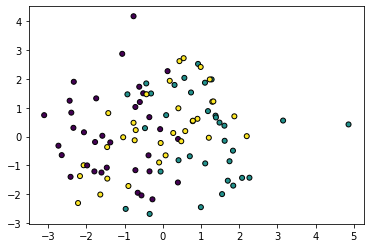

In [33]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

m = 100
X, Y = make_classification(n_samples=m, n_features=n0, n_redundant=0, n_informative=n0, n_classes=n2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k');
Y = np.eye(n2)[Y]

In [34]:
W1, W2, b1, b2 = training(X, Y, n1, 1, 3000)

Epoch 0: Training Loss = 1.09854246
Epoch 100: Training Loss = 0.66769965
Epoch 200: Training Loss = 0.62075226
Epoch 300: Training Loss = 0.53313843
Epoch 400: Training Loss = 0.43255480
Epoch 500: Training Loss = 0.37279295
Epoch 600: Training Loss = 0.33923461
Epoch 700: Training Loss = 0.31482535
Epoch 800: Training Loss = 0.29518944
Epoch 900: Training Loss = 0.27612031
Epoch 1000: Training Loss = 0.25750832
Epoch 1100: Training Loss = 0.24231282
Epoch 1200: Training Loss = 0.22891277
Epoch 1300: Training Loss = 0.21669590
Epoch 1400: Training Loss = 0.20563874
Epoch 1500: Training Loss = 0.19562613
Epoch 1600: Training Loss = 0.18646676
Epoch 1700: Training Loss = 0.17798751
Epoch 1800: Training Loss = 0.16999538
Epoch 1900: Training Loss = 0.16210703
Epoch 2000: Training Loss = 0.15379149
Epoch 2100: Training Loss = 0.14540899
Epoch 2200: Training Loss = 0.13679592
Epoch 2300: Training Loss = 0.12806248
Epoch 2400: Training Loss = 0.11971815
Epoch 2500: Training Loss = 0.1118198

In [35]:
assert isinstance(b1, np.ndarray), "b1 should be a numpy array."
assert isinstance(b2, np.ndarray), "b2 should be a numpy array."

assert b1.shape[0] == 1, "The number of rows in b1 is incorrect."
assert b1.shape[1] == n1, "The number of columns in b1 is incorrect."

assert b2.shape[0] == 1, "The number of rows in b2 is incorrect."
assert b2.shape[1] == n2, "The number of columns in b2 is incorrect."

assert isinstance(W1, np.ndarray), "W1 should be a numpy array."
assert isinstance(W2, np.ndarray), "W2 should be a numpy array."

assert W1.shape[0] == n0, "The number of rows in W1 is incorrect."
assert W1.shape[1] == n1, "The number of columns in W1 is incorrect."

assert W2.shape[0] == n1, "The number of rows in W2 is incorrect."
assert W2.shape[1] == n2, "The number of columns in W2 is incorrect."

assert np.allclose(np.round(W1[0,:], decimals=8), np.array([1.26422707, -0.70762336, 7.20233002, -2.53263138, 3.40793382, -5.59849532, 3.61526723])), "Trained weights W1 are incorrect."
assert np.allclose(np.round(b1, decimals = 8), np.array([6.93259983, 6.38592697, -1.368562, 3.32583488, 4.44835927, 2.09694021, -1.09501032])), "Trained weights b1 are incorrect."

In [36]:
For grading purpose: weight accuracy

SyntaxError: invalid syntax (764279130.py, line 1)

##### Prediction

Write a function to predict the label and class probabilities for a single input using the trained neural network.  You can use the function [`np.argmax`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) to find the largest element in an array.

In [37]:
def predict(W1, W2, b1, b2, x):
    '''
    Returns the predicted label y and class probabilities p for a single input.
    The predicted label should be an integer, and the class probabilities should be a vector.
    '''
    assert isinstance(x, np.ndarray) and x.shape == (1, n0), "Input should be a numpy array of shape (1, n0)."
    
    #Find the outputs with our weights. These are our predictions
    a1, p = forward_propagation(W1,W2,b1,b2,x)
    #The maximum is the index of our predicted class
    y = np.argmax(p)
    
    return y, p

In [38]:
x = np.array([[.9, 2.1, 0.1, -.1]])
y, p = predict(W1, W2, b1, b2, x)

In [39]:
assert not isinstance(y, np.ndarray), "y should be an integer, not a numpy array."
assert isinstance(p, np.ndarray), "p should be a numpy array."

assert y == 1, "Predicted label is incorrect."
assert np.allclose(np.round(p, decimals=8), np.array([1.0800000e-06, 9.7427047e-01, 2.5728450e-02])), "Class probabilities are incorrect."

In [40]:
# This cell has hidden tests, do not delete or edit it.

Congratulations, you just implemented your first neural network!

## Part 2
 
In the second part of this assignment, you will re-implement several functions using vectorization.  The main reason for vectorizing is to speed up the training process by performing operations in parallel rather than sequentially.  Rather than processing each training sample individually, you will stack all of the training examples into a matrix and rewrite the following functions to process all training samples simultaneously:

* forward propagation    
* backward propagation      
* training the network
* making predictions on new inputs

You will also write a function for gradient checking to verify that your backpropagation implementation is correct.

Let's define our notation: 

* The number of nodes in the input, hidden, and output layers are $n_0$, $n_1$, and $n_2$ respectively.

* The number of training samples in the data set is $m$.

* The input $X$ is a matrix of shape $(m, n_0)$ where each row corresponds to a training example.

* The output $Y$ is a matrix of shape $(m, n_2)$ where each row corresponds to a one hot encoded target label.

* The weights connecting the input and hidden layer are given by the matrix $W_1$ of shape $(n_0, n_1)$.

* The weights connecting the hidden and output layer are given by the matrix $W_2$ of shape $(n_1, n_2)$.

* The bias terms feeding into the hidden layer are given by the vector $b_1$ of shape $(1, n_1)$.

* The bias terms feeding into the output layer are given by the vector $b_2$ of shape $(1, n_2)$.

* The sigmoid activations for the hidden layer are given by the matrix $A_1$ of shape $(m, n_1)$.

* The softmax outputs at the output layer are given by the matrix $A_2$ of shape $(m, n_2)$.

##### Forward propagation with vectorization

Re-implement the forward propagation function to handle all training samples simultaneously.  Make sure to take advantage of broadcasting!

In [41]:
def forward_propagation_using_vectorization(W1, W2, b1, b2, X):
    '''
    Performs forward propagation on a set of data samples.
    X is a matrix of input data, where each row corresponds to a single data sample.
    
    Returns a tuple of matrices (A1, A2) containing the activations at the hidden and output layers
    for all training examples in X.
    '''
    #Matrix multiply and sigmoid activation
    A1 = sigmoid(np.matmul(X,W1) + b1)
    #Matrix multiply and softmax activation
    A2 = softmax(np.matmul(A1,W2) + b2)
    
    return (A1, A2)

In [42]:
(A1, A2) = forward_propagation_using_vectorization(W1, W2, b1, b2, X)

In [43]:
m = X.shape[0]

assert A1.shape[0] == m, "The number of rows in A1 is incorrect."
assert A1.shape[1] == n1, "The number of columns in A1 is incorrect."

assert A2.shape[0] == m, "The number of rows in A2 is incorrect."
assert A2.shape[1] == n2, "The number of columns in A2 is incorrect."

assert np.allclose(np.round(A1[50,0:4], decimals=8), np.array([9.9999983e-01, 9.9999989e-01, 1.0000000e+00, 1.8640000e-05])), "Incorrect values in A1."
assert np.allclose(np.round(A2[80,:], decimals=8), np.array([0.97858353, 0., 0.02141646])), "Incorrect values in A2."

In [44]:
# This cell has hidden tests, do not delete or edit it.

##### Backward propagation using vectorization.

Re-implement the backward propagation function to handle all training samples simultaneously. 

In [45]:
def back_propagation_using_vectorization(W1, W2, b1, b2, A1, A2, X, Y):
    '''
    Performs backpropagation on a set of training samples using vectorization.
    X is a matrix of input data, where each row corresponds to a single data sample.
    Y is a matrix of target labels, where each row corresponds to a one hot encoded label.
    
    Returns a tuple of matrices (dW1, dW2, db1, db2) containing the average gradients across all training examples.
    '''
    m = X.shape[0]

    # Save the shape of the biases for later
    db1Shape = b1.shape
    db2Shape = b2.shape
    #Run through the gradients from part 1)
    #This time, being careful with matrix dimensions
    da2 = Y*np.reciprocal(A2)
    dz2 = -Y  + A2
    db2 = dz2
    dW2 = np.matmul(A1.T,-Y) + np.matmul(A1.T, A2)
    da1 = np.matmul(-Y,W2.T) + np.matmul(A2, W2.T)
    dz1 = da1 *(1-A1)*A1
    db1 = dz1
    #Shape the biases into the shape of b1 and b2. Make sure to normalize sums
    db1 = np.reshape(np.sum(db1, axis=0)/m, db1Shape)
    db2 = np.reshape(np.sum(db2, axis=0)/m, db2Shape)
    dW1 = np.matmul(X.T,dz1)
    
    return (dW1/m, dW2/m, db1, db2)

In [46]:
dW1, dW2, db1, db2 = back_propagation_using_vectorization(W1, W2, b1, b2, A1, A2, X, Y)

In [47]:
assert isinstance(dW1, np.ndarray), "dW1 should be a numpy array."
assert isinstance(dW2, np.ndarray), "dW2 should be a numpy array."

assert dW2.shape[0] == n1, "The number of rows in dW2 is incorrect."
assert dW2.shape[1] == n2, "The number of columns in dW2 is incorrect."

assert dW1.shape[0] == n0, "The number of rows in dW1 is incorrect."
assert dW1.shape[1] == n1, "The number of columns in dW1 is incorrect."

assert isinstance(db1, np.ndarray), "db1 should be a numpy array."
assert isinstance(db2, np.ndarray), "db2 should be a numpy array."

assert db2.shape[0] == 1, "The number of rows in db2 is incorrect."
assert db2.shape[1] == n2, "The number of columns in db2 is incorrect."

assert db1.shape[0] == 1, "The number of rows in db1 is incorrect."
assert db1.shape[1] == n1, "The number of columns in db1 is incorrect."

assert np.allclose(np.round(dW1[:,5], decimals=8), np.array([ 0.00140916, -0.00019847, -0.00077643, -0.00097965])), "Incorrect values in dW1."
assert np.allclose(np.round(db1[0,0:4], decimals=8), np.array([-0.00079979, -0.00057636, -0.00034883, -0.00045457])), "Incorrect values in db1."

In [48]:
# This cell has hidden tests, do not delete or edit it.

#### Gradient Checking

You will implement a gradient checking function to verify that your backpropagation implementation is correct.  The gradient checking consists of the following steps:
- Set your network weights to arbitrary default values.
- Use your forward and backward propagation functions to calculate the gradients of the network weights.  These are the values that we would like to verify.
- For each network weight, compute the approximate gradient by doing the following:
    - Add a small epsilon to the weight/bias element of interest to create a modified set of network weights.
    - Perform forward propagation and calculate the loss for the modified network weights ($J_+$).
    - Subtract a small epsilon from the weight/bias element of interest to create another modified set of network weights.
    - Perform forward propagation and calculate the loss of these modified network weights ($J_-$).
    - Compute the approximate gradient for the element of interest as $\frac{J_+ - J_-}{2 * \epsilon}$.
- Once you have computed an approximate gradient for each network weight, compare your approximate gradient to your backpropagated gradient to verify that they approximately match.

To simplify your implementation, we will provide utility functions for flattening all network weights into a vector and extracting the network weights from a flattened vector.

In [49]:
def flattened(W1, W2, b1, b2):
    V = np.concatenate((W1.flatten(), W2.flatten(), b1.flatten(), b2.flatten()))
    return V

def reshaped(V, n0, n1, n2):
    t1 = n0*n1
    t2 = t1 + n1*n2
    t3 = t2 + n1
    W1 = V[:t1].reshape(n0, n1)
    W2 = V[t1:t2].reshape(n1, n2)
    b1 = V[t2:t3].reshape(1, n1)
    b2 = V[t3:].reshape(1, n2)
    return W1, W2, b1, b2

In [50]:
def gradient_checking(W1, W2, b1, b2, X, Y, epsilon = 1e-8):
    
    n0, n1, n2 = W1.shape[0], W2.shape[0], W2.shape[1]
    (A1, A2) = forward_propagation_using_vectorization(W1, W2, b1, b2, X)
    dW1, dW2, db1, db2 = back_propagation_using_vectorization(W1, W2, b1, b2, A1, A2, X, Y)
    V = flattened(W1, W2, b1, b2)
    grad = flattened(dW1, dW2, db1, db2)
    grad_approx = np.zeros_like(grad)
    
    for i in range(len(V)):
        
        V_plus = V.copy()
        V_plus[i] += epsilon
        V_minus = V.copy()
        V_minus[i] -= epsilon
        
        W1_plus, W2_plus, b1_plus, b2_plus = reshaped(V_plus, n0, n1, n2)
        W1_minus, W2_minus, b1_minus, b2_minus = reshaped(V_minus, n0, n1, n2)
        #Find predictions for the plus and minus conditions
        A1p, A2p = forward_propagation_using_vectorization(W1_plus, W2_plus, b1_plus, b2_plus, X)
        A1m, A2m = forward_propagation_using_vectorization(W1_minus, W2_minus, b1_minus, b2_minus, X)
        #Find loss for each condition
        lossp = cross_entropy_loss(A2p, Y)
        lossm = cross_entropy_loss(A2m, Y)
        #Find the approximate gradient value with the grad checking equation
        a_gradval = (lossp - lossm)/(2*epsilon)
        #add it to approximate gradients array
        grad_approx[i] = a_gradval
        
    maxerror = np.max(np.abs(grad - grad_approx))
    print("Max error in gradient approximation: {}".format(maxerror))
    if maxerror < epsilon:
        print('Passes gradient checking')
    else:
        print('Fails gradient checking')
    return maxerror

In [51]:
maxerror = gradient_checking(W1, W2, b1, b2, X, Y)

Max error in gradient approximation: 1.5818385791770834e-09
Passes gradient checking


In [52]:
assert maxerror < 1e-8, "Gradient checking fails."

##### Training using vectorization

Re-implement the training function with vectorization.  Note that the inner for loop will be eliminated, since the forward and backward propagation functions now process the entire training set simultaneously.  You will still iterate multiple times thru the entire training dataset, so the outer for loop will remain.  Your vectorized implementation should be much, much faster than your earlier implementation!

In [53]:
def training_using_vectorization(X, Y, num_hidden, alpha, num_epochs):
    '''
    Learn the network weights on a set of training examples.  This implementation is vectorized.
    
    Inputs
    ------
    X: a matrix containing the training data, where each row corresponds to a single training example
    Y: a matrix containing the target labels, where each row contains a one hot encoded target label.
    num_hidden: specifies the number of hidden units in the neural network.
    alpha: the learning rate for gradient descent
    num_epochs: the number of times to iterate over the dataset
    
    Returns a tuple of matrices (W1, W2, b1, b2) containing the learned network weights.
    '''
    
    n0 = X.shape[1] 
    n1 = num_hidden
    n2 = Y.shape[1]
    m = X.shape[0]
    
    W1, W2 = initialize_weights(n0, n1, n2)
    b1, b2 = initialize_bias(n0, n1, n2)
    
    for epoch in range(num_epochs):
        #Find the prediction with all weights
        A1, A2 = forward_propagation_using_vectorization(W1, W2, b1, b2, X)
        #backpropagate for gradients
        dW1, dW2, db1, db2 = back_propagation_using_vectorization(W1, W2, b1, b2, A1, A2, X, Y)
        #Calculate loss
        loss = cross_entropy_loss(A2, Y)
        #Update with gradients
        W1, W2, b1, b2 = update_parameters(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        
        
        if epoch % 100 == 0:
            print('Epoch {}: Training Loss = {:.8f}'.format(epoch, loss))    
    
    return W1, W2, b1, b2

In [54]:
W1, W2, b1, b2 = training_using_vectorization(X, Y, n1, 1, 3000)

Epoch 0: Training Loss = 1.09854246
Epoch 100: Training Loss = 0.66769965
Epoch 200: Training Loss = 0.62075226
Epoch 300: Training Loss = 0.53313843
Epoch 400: Training Loss = 0.43255480
Epoch 500: Training Loss = 0.37279295
Epoch 600: Training Loss = 0.33923461
Epoch 700: Training Loss = 0.31482535
Epoch 800: Training Loss = 0.29518944
Epoch 900: Training Loss = 0.27612031
Epoch 1000: Training Loss = 0.25750832
Epoch 1100: Training Loss = 0.24231282
Epoch 1200: Training Loss = 0.22891277
Epoch 1300: Training Loss = 0.21669590
Epoch 1400: Training Loss = 0.20563874
Epoch 1500: Training Loss = 0.19562613
Epoch 1600: Training Loss = 0.18646676
Epoch 1700: Training Loss = 0.17798751
Epoch 1800: Training Loss = 0.16999538
Epoch 1900: Training Loss = 0.16210703
Epoch 2000: Training Loss = 0.15379149
Epoch 2100: Training Loss = 0.14540899
Epoch 2200: Training Loss = 0.13679592
Epoch 2300: Training Loss = 0.12806248
Epoch 2400: Training Loss = 0.11971815
Epoch 2500: Training Loss = 0.1118198

In [55]:
assert isinstance(b1, np.ndarray), "b1 should be a numpy array."
assert isinstance(b2, np.ndarray), "b2 should be a numpy array."

assert b1.shape[0] == 1, "The number of rows in b1 is incorrect."
assert b1.shape[1] == n1, "The number of columns in b1 is incorrect."

assert b2.shape[0] == 1, "The number of rows in b2 is incorrect."
assert b2.shape[1] == n2, "The number of columns in b2 is incorrect."

assert isinstance(W1, np.ndarray), "W1 should be a numpy array."
assert isinstance(W2, np.ndarray), "W2 should be a numpy array."

assert W1.shape[0] == n0, "The number of rows in W1 is incorrect."
assert W1.shape[1] == n1, "The number of columns in W1 is incorrect."

assert W2.shape[0] == n1, "The number of rows in W2 is incorrect."
assert W2.shape[1] == n2, "The number of columns in W2 is incorrect."

assert np.allclose(np.round(W1[0,:], decimals=8), np.array([1.26422707, -0.70762336, 7.20233002, -2.53263138, 3.40793382, -5.59849532, 3.61526723]))
assert np.allclose(np.round(b1, decimals = 8), np.array([6.93259983, 6.38592697, -1.368562, 3.32583488, 4.44835927, 2.09694021, -1.09501032]))

In [56]:
For grading purpose: accuracy

SyntaxError: invalid syntax (37804519.py, line 1)

##### Prediction using vectorization

Re-implement the prediction function using vectorization.

In [57]:
def predict_using_vectorization(W1, W2, b1, b2, X):
    '''
    Returns the predicted labels 'Y' and class probabilities 'P' for a set of data samples.
    X is a matrix specifying the data, where each row corresponds to a single data sample.
    Y is a vector of integers specifying the predicted class labels.
    P is matrix of probabilities, where each row specifies the class probabilities for a single data sample.
    '''
    #Forward propagate for predictions
    A1, P = forward_propagation_using_vectorization(W1, W2, b1, b2, X)
    #Maximum value index is predicted class
    Y = np.argmax(P, axis = 1)
    return Y, P

In [58]:
Y_pred, P = predict_using_vectorization(W1, W2, b1, b2, X)

In [59]:
assert isinstance(Y_pred, np.ndarray) and Y_pred.shape == (X.shape[0],), "Y should be a numpy array of shape (m,)"
assert isinstance(P, np.ndarray) and P.shape == (X.shape[0], n2), "P should be a numpy array of shape (m, n2)."
assert np.array_equal(Y_pred[0:5], np.array([2, 0, 2, 1, 1])), "Incorrect predicted labels."
assert np.allclose(np.round(P[15,:], decimals = 8), np.array([2.8000000e-07, 9.9999825e-01, 1.4700000e-06])), "Incorrect class probabilities (test 1)."
assert np.allclose(np.round(P[25,:], decimals=8), np.array([0.14677544, 0.06200546, 0.7912191 ])), "Incorrect class probabilities (test 2)."

## Part 3

In the third part of this assignment, you will use the functions you implemented to train an autoencoder.  An autoencoder is a neural network whose inputs and outputs are identical.  In other words, it is a network that is trained to learn the identity function.  You will train a neural network with 8 inputs, 3 hidden units, and 8 outputs.

Why is learning the identity function useful?  By using a smaller number of hidden units than the number of inputs, we can force the neural network to learn a representation of the input that is more compact.

This part of the assignment is open-ended.  Your goal is to do the following:
- Create a set of inputs and outputs to train the autoencoder.  The data samples should be one hot encoded labels for eight different classes.  Since there are only 8 different possibilities, your data set should contain 8 data samples.
- Train a neural network with 3 hidden units using the functions you implemented in parts 1 and 2.  Train the network until the training loss has approximately converged.
- Look at the 3-dimensional representation for each of the 8 possible inputs.  Comment on what you observe.

You may use as many cells and code blocks as necessary.

In [60]:
# Create a set of inputs

# Define our network layer sizes and training set size
n0 = 8 # size of input layer
n1 = 3 # size of hidden layer
n2 = 8 # size of output layer
N = 100000 # size of training set
X = []

#Create data:
for i in range(N):
    index = int(np.random.rand(1) * 8) #Randomly decide a value 1-8
    #Create a training sample with a 1 at decided index
    temp = np.zeros(8)
    temp[index] = 1
    X.append(temp)
#Make the training set a numpy array and set labels equal to inputs
#for autoencoder
X = np.array(X)
Y = X

In [61]:
# Train your network. Use as many cells and code blocks as necessary.

# Run the training loop on our dataset
# Can reduce the iterations or size of train set to improve runtime
W1, W2, b1, b2 = training_using_vectorization(X, Y, n1, 1, 2000)

Epoch 0: Training Loss = 2.07950805
Epoch 100: Training Loss = 2.06730969
Epoch 200: Training Loss = 1.39399517
Epoch 300: Training Loss = 0.50617516
Epoch 400: Training Loss = 0.20823116
Epoch 500: Training Loss = 0.12266651
Epoch 600: Training Loss = 0.08590644
Epoch 700: Training Loss = 0.06587001
Epoch 800: Training Loss = 0.05334363
Epoch 900: Training Loss = 0.04479530
Epoch 1000: Training Loss = 0.03859810
Epoch 1100: Training Loss = 0.03390270
Epoch 1200: Training Loss = 0.03022369
Epoch 1300: Training Loss = 0.02726402
Epoch 1400: Training Loss = 0.02483188
Epoch 1500: Training Loss = 0.02279797
Epoch 1600: Training Loss = 0.02107200
Epoch 1700: Training Loss = 0.01958901
Epoch 1800: Training Loss = 0.01830112
Epoch 1900: Training Loss = 0.01717221


The autoencoder works by encoding the 8 inputs to be as far away from each other as possible in 3D space. This is further explored below. Let's look at the values and a graph of the 8 representations:

Representations generated by the model:
[[ 4.   -3.89  2.91]]
[[ 3.05  3.47 -3.95]]
[[-3.69 -3.38 -2.77]]
[[-3.44 -3.9   4.21]]
[[3.5  3.4  3.21]]
[[-3.96  4.11 -3.38]]
[[ 3.4  -3.55 -4.22]]
[[-3.69  3.01  3.53]]


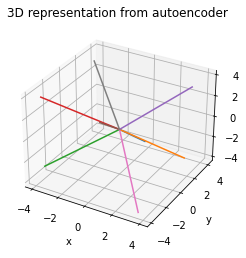

In [62]:
# Look at the 3-dimensional representation for each of the 8 possible inputs. 
#Import tools for graphing
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Create a figure for 3D plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('3D representation from autoencoder')
plt.xlabel('x')
plt.ylabel('y')
#Create a vector for storing the 3D representations of the 8D inputs
repns = []
print("Representations generated by the model:")
#For each representation, plot in 3D space
for i in range(8):
    x = np.zeros(8)
    x[i] = 1 #Create one of the inputs
    rep = np.matmul(x, W1)+b1 #Run through model for 3D representation
    repns.append(rep) #Save representation for later
    #Plot it in 3D!
    line = np.array(([0, rep[0][0]],[0, rep[0][1]],[0, rep[0][2]]))
    ax.plot3D(line[0], line[1], line[2])
    #Also print the vectors for each representation in 3D
    print(np.around(rep,2))

The Encoder looks like it is building a cube! Each of the representations points towards a different corner of the cube, making the maximum separation of the eight representations in three dimensional space. This makes sense because having the most possible separation in 3D makes it easiest to discern each input when converting back to 8D in the output layer.

We can also look at the angle between the representations:

In [63]:
#Create some functions for calculating angles between 3d vectors
import math
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

#Find the angle between every representation and all other representations
#Put them in a matrix angles
angles = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        if i!=j:
            angles[i][j]=angle(repns[i][0], repns[j][0])
#Convert radians to degrees
print("Angles between the representations in 3D space")
print("Row 1 is angles from representation 1 to all other representations, etc\n")
print(np.around(angles * 180/math.pi, 1))


Angles between the representations in 3D space
Row 1 is angles from representation 1 to all other representations, etc

[[  0.  109.5 105.5  71.1  74.1 176.5  68.2 115.8]
 [109.5   0.  110.3 178.5  74.   67.3  68.1 114.1]
 [105.5 110.3   0.   68.2 175.4  74.6  72.5 100.7]
 [ 71.1 178.5  68.2   0.  107.5 112.  111.2  66.5]
 [ 74.1  74.  175.4 107.5   0.  106.1 111.3  75.5]
 [176.5  67.3  74.6 112.  106.1   0.  108.7  67.4]
 [ 68.2  68.1  72.5 111.2 111.3 108.7   0.  173.1]
 [115.8 114.1 100.7  66.5  75.5  67.4 173.1   0. ]]


For a perfect cube(which creates the most separation between eight points in 3D), we would expect each representation to have an angle of 0 with itself, angle of 70.5 deg with three other representations, angle of 109.5 deg with three more representations, and angle of 180 deg with the final representation. The angles produced by our autoencoder match this very closely! The neural net was able to produce a nearly optimal separation of the eight representations in 3D space.

Generally, it seems that for any number of inputs n and hidden layers h, the autoencoder tries to map the n inputs to h-dimensional vectors with the most separation between them.